#Randomized Response
Suppose we have $n$ users, each one of them with a value $v_i$ that indicates their health condition (e.g. they have cancer). Each user $i$ has a value $w_i \in \{-1, 1\}$, indicating whether they have a certain condition (1) or not (-1). 

In order to protect users' privacy we apply the following procedure. We indicate with $x_i$ the value we are going to report. 

$x_i = w_i$ w.p. $1 - p$, 1 or -1 w.p. $\frac{p}{2}$

We want to find out how changing $p$ or the number of users $n$ in the dataset can change the estimate of the number of 1s in the system. Also we want to see if there is any relation between the percentage of positive cases (the norm should be that they're fewer than the negative cases) and the probability $p$ we use to report the true value of a user.

In [21]:
%matplotlib inline

import numpy as np
import random
from collections import defaultdict
from matplotlib import pyplot as plt

In [2]:
def create_population(n=1000, rate=0.05):
    """
    
    :param n: the number of users in the dataset
    :param rate: the positive cases rate. It is how many 1s we want in the array
    :return: user_data: an array containing user values in {-1, 1}
    """
    
    return np.random.choice(a=[-1, 1], size=n, p=[1 - rate, rate])

In [3]:
# Simple data analysis
num_users = 1000
positives_rate = 0.05
users = create_population(num_users, positives_rate)
positive = (users == 1).sum()
negative = (users == -1).sum()
print('Positive cases = %d\nNegative cases = %d' % (positive, negative))
print('Fraction of positive cases = %.4f' % (positive/num_users))

Positive cases = 48
Negative cases = 952
Fraction of positive cases = 0.0480


In [4]:
def randomized_response(users, p=0.1):
    rand_users = []
    for user_value in users:
        if random() <= (1 - p):
            rand_users.append(user_value) # we report the original value
        else: # we toss a coin with bias p/2
            if random() <= p/2:
                rand_users.append(1)
            else:
                rand_users.append(-1)
    return np.array(rand_users)

In [8]:
rand_users = randomized_response(users, p = 0.1)

positive = (users == 1).sum()
negative = (users == -1).sum()
print('Positive cases = %d\nNegative cases = %d' % (positive, negative))
print('Fraction of positive cases = %.4f' % (positive/num_users))

rand_positives = (rand_users == 1).sum()
rand_negatives = (rand_users == -1).sum()
print('\n*** RANDOMIZED RESPONSE ***\n')
print('Positive cases = %d\nNegative cases = %d' % (rand_positives, rand_negatives))
print('Fraction of positive cases = %.4f' % (rand_positives/num_users))

Positive cases = 48
Negative cases = 952
Fraction of positive cases = 0.0480

*** RANDOMIZED RESPONSE ***

Positive cases = 47
Negative cases = 953
Fraction of positive cases = 0.0470


In [81]:
# We collect results for different values of n and p

NUM_ROUNDS = 100
NUM_USERS = [100, 1000, 10000, 100000]
RANGE_P = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
positive_rates = 0.05
scores = defaultdict(list)
true_values = []

for n in NUM_USERS:
    print('Population size: %d' %n)
    users = create_population(n, positives_rate)
    true_values.append((users == 1).sum())
    
    for p in RANGE_P:
        print('Randomized response with p = %.2f' %p)
        tmp = []
        
        for r in range(NUM_ROUNDS):
            rand_users = randomized_response(users, p)
            tmp.append((rand_users == 1).sum())
            
        scores[(n,p)].append(tmp)

            

Population size: 100
Randomized response with p = 0.10
Randomized response with p = 0.20
Randomized response with p = 0.30
Randomized response with p = 0.40
Randomized response with p = 0.50
Randomized response with p = 0.60
Randomized response with p = 0.70
Randomized response with p = 0.80
Randomized response with p = 0.90
Population size: 1000
Randomized response with p = 0.10
Randomized response with p = 0.20
Randomized response with p = 0.30
Randomized response with p = 0.40
Randomized response with p = 0.50
Randomized response with p = 0.60
Randomized response with p = 0.70


Randomized response with p = 0.80
Randomized response with p = 0.90
Population size: 10000
Randomized response with p = 0.10


Randomized response with p = 0.20


Randomized response with p = 0.30


Randomized response with p = 0.40


Randomized response with p = 0.50


Randomized response with p = 0.60


Randomized response with p = 0.70


Randomized response with p = 0.80


Randomized response with p = 0.90


Population size: 100000
Randomized response with p = 0.10


Randomized response with p = 0.20


Randomized response with p = 0.30


Randomized response with p = 0.40


Randomized response with p = 0.50


Randomized response with p = 0.60


Randomized response with p = 0.70


Randomized response with p = 0.80


Randomized response with p = 0.90


In [79]:
def get_mean_var_users_size(scores, size=100):
    means = []
    vars = []
    for (n, p) in scores:
        if n == size:
            means.append(np.mean(scores[n, p]))
            vars.append(np.var(scores[n, p]))
    return means, vars

def plot_mean_var(scores, baseline, size=100):
    means, vars = get_mean_var_users_size(scores, size=size)
    baselines = [baseline for _ in RANGE_P]
    plt.plot(RANGE_P, means, label='Average positive cases')
    plt.errorbar(RANGE_P, means, vars, linestyle='None', marker='^', label='Variance')
    plt.plot(RANGE_P, baselines, label='Baseline')
    plt.legend()
    plt.xlabel('Value of p')
    plt.ylabel('Number of positive cases')
    plt.title('Number of users = %d\nOriginal value = %d' % (size, baseline))


We now show how the number of positive cases changes when we use different values for p. The higher is p the higher is the mean, i.e. the mean differs from the original.  

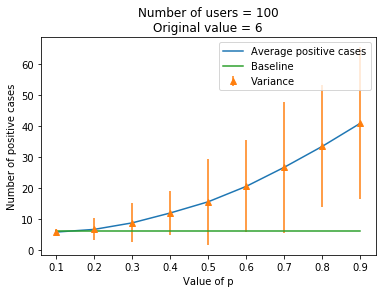

In [93]:
plot_mean_var(scores, true_values[0], size=100)

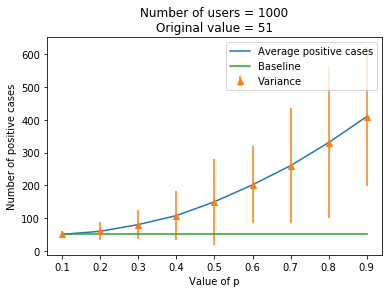

In [76]:
plot_mean_var(scores, true_values[1], size=1000)

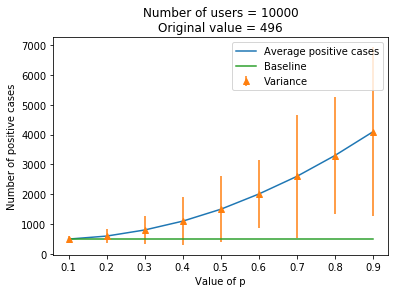

In [77]:
plot_mean_var(scores, true_values[2], size=10000)

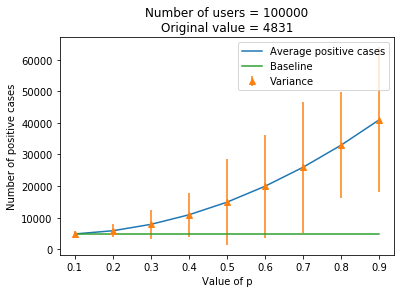

In [78]:
plot_mean_var(scores, true_values[3], size=100000)

We fix p and see how the variance should decrease while changing n.

The greater is n the lower should be the variance. Notice that when we create a population the number of 1s increases, so also the variance would increase because we have in practice a larger number of ones. In order to avoid this we scale down the variance. For example the variance for $n=200$ is divided by 2, in order to compare it with the variance of $n=100$.

In [127]:
NUM_ROUNDS = 100
NUM_USERS = [100, 200, 500, 1000, 2000, 5000, 10000, 25000, 
             50000, 100000]
positive_rates = 0.05
scores = defaultdict(list)
true_values = []
p = 0.1

for n in NUM_USERS:
    print('Population size: %d' % n)
    users = create_population(n, positives_rate)
    true_values.append((users == 1).sum())
    tmp = []

    for r in range(NUM_ROUNDS):
        rand_users = randomized_response(users, p)
        tmp.append((rand_users == 1).sum())

    scores[n].append(tmp)


Population size: 100
Population size: 200
Population size: 500
Population size: 1000
Population size: 2000
Population size: 5000
Population size: 10000


Population size: 25000


Population size: 50000


Population size: 100000


In [170]:
users = create_population(n = 100000, rate=0.05)
values = defaultdict(list)

for n in NUM_USERS
    for r in range(NUM_ROUNDS):
        indices = np.random.choice(users.shape[0], n, replace=False)
        sample = users[indices]
        rand_users = randomized_response(sample, p=0.1)
        values[n].append((rand_users == 1).sum())

variances = [np.var(values[n]) for n in values]
print(variances)

[4.522399999999999, 12.4604, 20.4116, 51.974399999999996, 94.24960000000003, 196.5144, 419.3236, 1193.6203999999998, 1677.5203999999999, 1008.49]
